# The benchmark testing for KDD Cup Dataset
In this notebook, the general steps of classification procedure is presented. Two methods (Random Foreast and Neural Network) are going to be exploited for the problem of attack identification and detection with the existing dataset - KDDCup'99. This notebook shows the way to program with Tensorflow, SKLearn, NumPy and Matplotlib. 

## Data Engineering

### Environment SetUp
If the enviroment is not ready for the procedure, install all the general toolkits to the enviorment. If the enviornment is ready, skip this step.

In [ ]:
#! pip3 install numpy
#! pip3 install pandas
#! pip3 install -U scikit-learn
#! pip3 install graphviz
#! pip3 install pydotplus

### General SetUp
First of all, we import all the needed libraries to the kernel.

In [34]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
from IPython.display import Image
import pydotplus
import math
from sklearn.model_selection import train_test_split

Second, load the data into the kernel. pd.read_csv() loads the dataset from the csv file and returns a dataframe structure. It could be utilized in the following steps. The required parameters in pd.read_csv() include the path to the dataset, the used coloumns and so on.

In [2]:
data_path = "../../../Dataset/kddcup99.csv"

dataset = pd.read_csv(data_path, sep=',', usecols=range(0, 42))

print("Dataset Shape:", dataset.shape)

Dataset Shape: (494020, 42)


Show the whole dataset.

In [3]:
dataset

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.00,0.00,0.00,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.00,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.00,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.00,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.00,0.0,normal
5,0,tcp,http,SF,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.00,0.00,0.00,0.00,0.0,normal
6,0,tcp,http,SF,212,1940,0,0,0,0,...,69,1.0,0.0,1.00,0.04,0.00,0.00,0.00,0.0,normal
7,0,tcp,http,SF,159,4087,0,0,0,0,...,79,1.0,0.0,0.09,0.04,0.00,0.00,0.00,0.0,normal
8,0,tcp,http,SF,210,151,0,0,0,0,...,89,1.0,0.0,0.12,0.04,0.00,0.00,0.00,0.0,normal
9,0,tcp,http,SF,212,786,0,0,0,1,...,99,1.0,0.0,0.12,0.05,0.00,0.00,0.00,0.0,normal


### Start the pre-training SetUp
Divide the dataset into two types, one is the collection of features (input_x) and the other is the labels (input_y). There are 41 features and 5 classes. Using Sklearn's train_test_split() to split 20% of data into testing set and the rest is assigned as training set. 

In [4]:
input_x = dataset.iloc[:, 0:41]
input_y = dataset.iloc[:, 41]

train_x, test_x, train_y, test_y = train_test_split(input_x, input_y, test_size=0.20)

Categorize the attack type into two classes: normal and abnormal. Here, we only detect the malicious network traffic. The pre-defined array of new class is ready for the replacement. 

In [5]:
new_class = {'back':'abnormal', 'buffer_overflow':'abnormal', 'ftp_write':'abnormal', 'guess_passwd':'abnormal', 'imap':'abnormal',
            'ipsweep':'abnormal', 'land':'abnormal', 'loadmodule':'abnormal', 'multihop':'abnormal', 'neptune':'abnormal', 'nmap':'abnormal',
            'perl':'abnormal', 'phf':'abnormal', 'pod':'abnormal', 'portsweep':'abnormal', 'rootkit':'abnormal', 'satan':'abnormal',
            'smurf':'abnormal', 'spy':'abnormal', 'teardrop':'abnormal', 'warezclient':'abnormal', 'warezmaster':'abnormal'}
train_y = train_y.replace(new_class)
test_y = test_y.replace(new_class)

### Data Encoding
Transfer the features and label into representative numbers. Here we need the support from SkLearn library.

In [6]:
from sklearn import preprocessing

In [7]:
train_y

229537    abnormal
132404    abnormal
248993    abnormal
323956    abnormal
239986    abnormal
481751      normal
283283    abnormal
249791    abnormal
48932     abnormal
380788    abnormal
307204    abnormal
469380    abnormal
138844      normal
37577       normal
221628    abnormal
226586    abnormal
168759    abnormal
198475    abnormal
161794    abnormal
169769    abnormal
351196    abnormal
292667    abnormal
396733      normal
115819    abnormal
153285    abnormal
460858    abnormal
259367    abnormal
272648    abnormal
421598    abnormal
215344    abnormal
            ...   
48915     abnormal
272037    abnormal
133510    abnormal
69320     abnormal
1402        normal
33670       normal
300445    abnormal
426027    abnormal
451627      normal
468412    abnormal
412721    abnormal
152802    abnormal
207151    abnormal
332280    abnormal
165531    abnormal
407438    abnormal
185488    abnormal
368425    abnormal
116656    abnormal
431719    abnormal
156443    abnormal
33387       

Encode the label of training and testing set by using Sklearn.preprocessing.LabelEncoder() in order to make the data all in the representative way.

In [8]:
le_y = preprocessing.LabelEncoder()
le_y.fit(train_y)
train_y = le_y.transform(train_y)
test_y = le_y.transform(test_y)

Not only encoding the label but also the features. Need to column by column to transform the value. 

In [9]:
for col in train_x.columns:
    if train_x[col].dtype == type(object):
        le_x = preprocessing.LabelEncoder()
        le_x.fit(train_x[col])
        train_x[col] = le_x.transform(train_x[col])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [10]:
for col in test_x.columns:
    if test_x[col].dtype == type(object):
        le_x = preprocessing.LabelEncoder()
        le_x.fit(test_x[col])
        test_x[col] = le_x.transform(test_x[col])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


## 1. Decision Tree
Start trainning with Decision Tree Classifier.

In [11]:
from sklearn import tree
start_time = time.time()
clf = tree.DecisionTreeClassifier()
dt = clf.fit(train_x, train_y)
rtime_DT = time.time() - start_time

Draw the decision tree by using "graphviz" and save the graph to png.

In [12]:
import graphviz 
tree_data = tree.export_graphviz(clf, out_file=None)  
graph = pydotplus.graph_from_dot_data(tree_data)  
Image(graph.create_png())
graph.write_png("tree.png") 

True

In [13]:
ac_DT = clf.score(test_x, test_y)
print(ac_DT)

0.9996862475203433


## 2. Random Forest Classifier
Start trainning with random forest classifier.

In [14]:
from sklearn.ensemble import RandomForestClassifier
start_time = time.time()
clf = RandomForestClassifier(n_estimators=100)
clf.fit(train_x, train_y)
rtime_RF = time.time() - start_time

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [15]:
print(clf.feature_importances_)
ac_RF = clf.score(test_x, test_y)
print(ac_RF)

[7.98018060e-03 5.02474469e-02 2.48034558e-02 2.54741752e-02
 3.46551030e-02 1.45173837e-01 5.09282584e-06 3.08716445e-03
 6.85345691e-06 7.82955176e-03 7.28667167e-05 1.11186437e-01
 6.02943138e-03 4.51376879e-05 4.09535217e-06 5.88041128e-05
 3.73497398e-05 1.36508067e-05 3.83951245e-05 0.00000000e+00
 0.00000000e+00 4.42345443e-04 2.14184040e-01 3.07107827e-02
 1.79913356e-02 1.70052487e-03 1.12093071e-03 4.46022223e-03
 8.49520065e-03 4.15065710e-02 2.01680303e-02 8.30399644e-02
 1.21706986e-02 3.01215417e-02 6.66737055e-03 4.50600465e-02
 5.13421393e-02 2.71000567e-03 4.10101503e-03 4.02367007e-03
 3.23453523e-03]
0.9998178211408445


## 3. Support Vector Machine (SVM) Classifier
Start trainning with SVM classifier

In [16]:
from sklearn.svm import LinearSVC
start_time = time.time()
clf = LinearSVC(random_state=0, tol=1e-5)
clf.fit(train_x, train_y)
rtime_SVM = time.time() - start_time

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=0, tol=1e-05,
          verbose=0)

In [28]:
ac_SVM = clf.score(test_x, test_y)
print(ac_SVM)

0.990820209708109


## 4. KNN Classifier

In [40]:
from sklearn.neighbors import KNeighborsClassifier
start_time = time.time()
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(train_x, train_y)
rtime_KNN = time.time() - start_time

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [41]:
ac_KNN = clf.score(test_x, test_y)
print(ac_KNN)

0.9993826160884175


## Result evaluation

Apply the trained model to the testing dataset, and print the accuracy and confusion matrix.

In [ ]:
prid = clf.predict(test_x)

print("Accuracy:", clf.score(test_x, test_y))

Draw a confusion matrix to see the FP, FN, TP, TN.

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(prid, test_y))

([<matplotlib.axis.XTick at 0x134dabd30>,
 <a list of 4 Text xticklabel objects>)

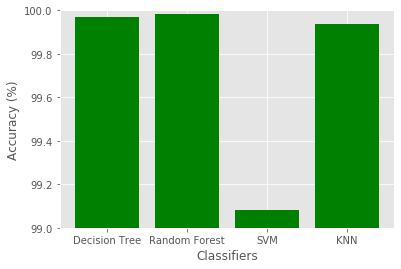

In [50]:
accuracy = [ac_DT*100, ac_RF*100, ac_SVM*100, ac_KNN*100]
classifier = ['Decision Tree', 'Random Forest', 'SVM', 'KNN']
plot.style.use('ggplot')
x_pos = [i for i, _ in enumerate(classifier)]
low = min(accuracy)
high = max(accuracy)
plot.ylim([math.ceil(low-0.2*(high-low)), math.floor(high+0.1*(high-low))])
plot.bar(x_pos, accuracy, color='green')
plot.xlabel("Classifiers")
plot.ylabel("Accuracy (%)")
plot.xticks(x_pos, classifier)